### Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

### Objective 

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Key Questions

* Perform EDA.
* Apply Clustering Algorithms and mentions how many clusters are formed ?
* How are these segments different from each other?
* What are your recommendations to the bank on how to better market to and service these customers?

#### About the Data Set

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Reading the dataset 
path = 'C:/Users/sandh/OneDrive/Documents/PGDSBA/Programming/Projects/Unsupervised Learning-All Life Bank/'
data = pd.read_excel(path+'Credit Card Customer Data.xlsx')

In [3]:
# copying data to another varaible to avoid any changes to original data
df=data.copy()

#### View the first 5 and last 5 rows of the dataset

In [4]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


#### Understand the shape of the data

In [6]:
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 660 rows and 7 columns.


In [7]:
#### Check the datatypes and columns of the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**
    
* There are no null values in the columns
* All of the columns are of int data type

In [9]:
#dropping the Sl_no.& Customer Key column as it does not hold any statistical significance
df.drop(['Sl_No','Customer Key'],axis=1,inplace=True)

#### Summary of the dataset

In [10]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


### Observations

* The avg number of credit cards held by customers is 5
* The avg number of visits(2 visits) made to bank and visits made online by the customers are similar but the maximum number of online visits are more than in-person bank visits
* Max number of calls made to the bank is 10.

## EDA

### Univariate Analysis

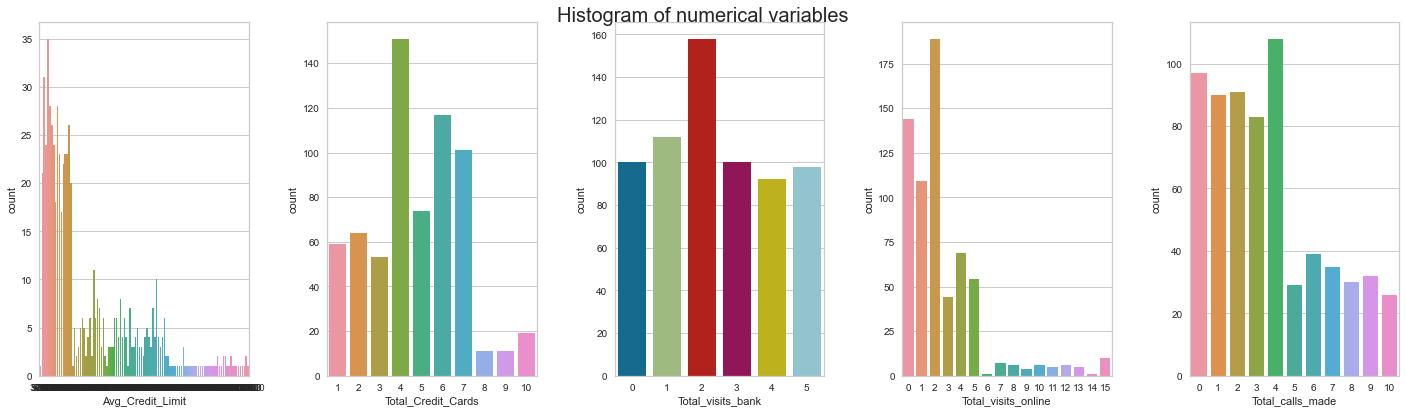

In [11]:
all_col = df.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Observations:**

* Avg_Credit_Limit Varies from 3000 to 200000
* Most of the customers have 4 credit cards
* There has been a max of 2 visits to the bank by most of the customers
* Most of the customers made 2 online visits to the bank
* The no:of calls made by most of the customers to the bank is 4

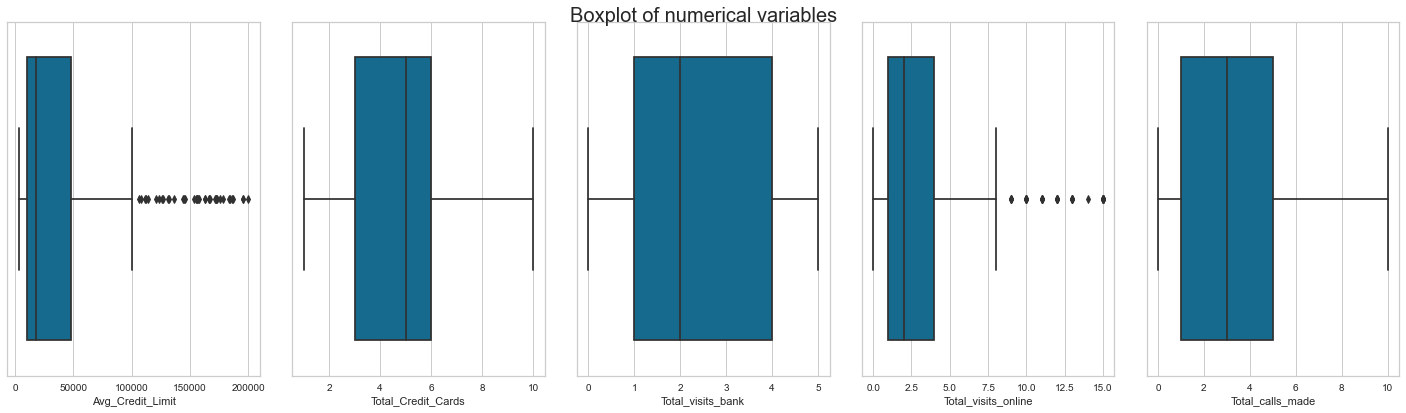

In [12]:
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

* 50% of customers have Avg_Credit_Limit between 20000 to 50000.We can see outlier values here
* 50% of customers hold between 3 to 6 number of credit_cards
* 50% of customers has made between 1 to 4 total visits to the bank
* 50% of customers has made between 1 to 4 online visits to the bank portal.We can see few outlier values here
* 75% of customers have made less than 10 calls to the bank

### CDF plot of numerical variables

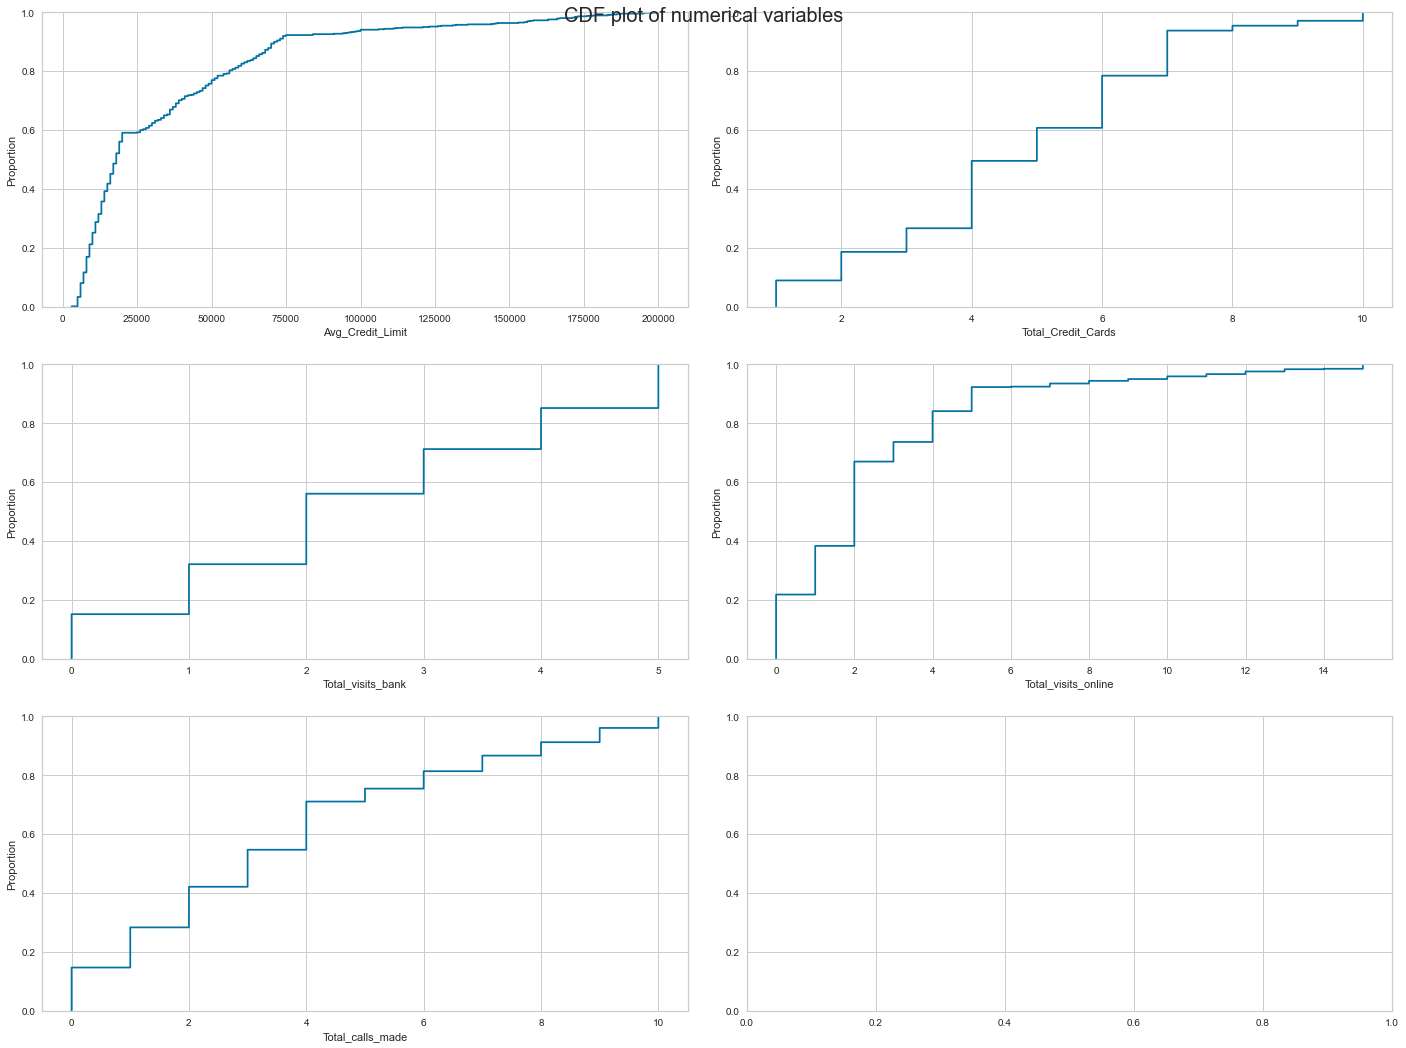

In [13]:
# select numerical columns
all_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('CDF plot of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0],x=df[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1],x=df[all_col[counter]])
        counter = counter+1
    else:
        pass


fig.tight_layout(pad=2.0)

* 90% of customers have credit_limit less than 75000
* 80% of customers have less than 6 credit cards
* 90% of customers make less than 4 in person visits to the bank
* 90% of customers make less than 5 online visits to the bank
* 90% of customers have made less than 8 calls to the bank

### Bivariate Analysis

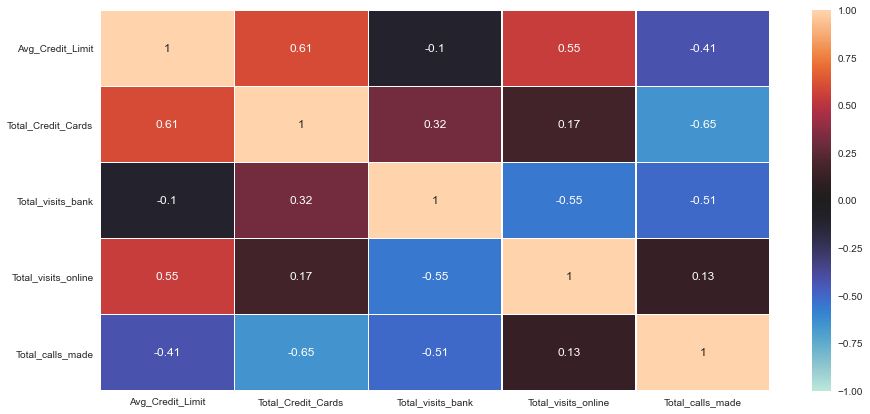

In [14]:
plt.figure(figsize=(15,7))

sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)            

plt.show()

**Observations**
* Avg_Credit_Limit and Total_Credit_Cards are positively correlated.
* Avg_Credit_Limit has positive correlation with visits_online but has negative correlation in-person visits(Total_visits_bank) to the bank and calls made to the bank(Total_calls_made)
* Total_calls_made is negatively correlated to total_visits_bank which makes sense .

### Pairplots

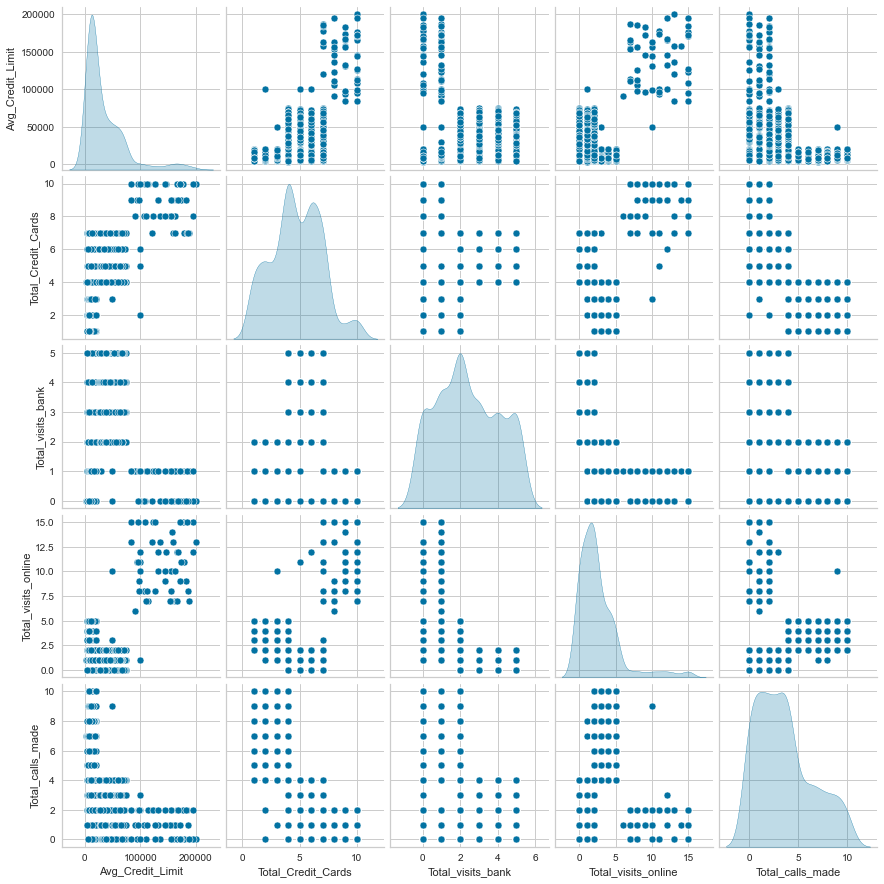

In [15]:
sns.pairplot(df[all_col],diag_kind="kde")

**Observations:**
* Avg_Credit_Limit and Total_visits_online has similar distribution of patterns
* Total_Credit_Cards are showing 4 distinct peaks in the graph
* Total_visits_bank is showing multiple peaks


### Let's find the percentage of outliers, in each column of the data, using IQR.¶

In [16]:
Q1 = df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [17]:
((df.select_dtypes(include=['int64'])<lower) | (df.select_dtypes(include=['int64'])>upper)).sum()/len(data)*100

Avg_Credit_Limit       5.909091
Total_Credit_Cards     0.000000
Total_visits_bank      0.000000
Total_visits_online    5.606061
Total_calls_made       0.000000
dtype: float64

* There are outliers in columns Avg_Credit_Limit and Total_visits_online.Lets treat them 

### Treating Outliers

In [18]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [19]:

numerical_col = {'Avg_Credit_Limit','Total_visits_online'} 
df = treat_outliers_all(df,numerical_col)

In [20]:
((df.select_dtypes(include=['int64'])<lower) | (df.select_dtypes(include=['int64'])>upper)).sum()/len(data)*100

Avg_Credit_Limit       0.0
Total_Credit_Cards     0.0
Total_calls_made       0.0
Total_visits_bank      0.0
Total_visits_online    0.0
dtype: float64

**We have treated the outliers present for the columns Avg_Credit_Limit and Total_visits_online**

### Scaling the Data Set

In [21]:
# Scaling the data set before clustering
scaler=StandardScaler()
subset=df.copy()
subset_scaled=scaler.fit_transform(subset)

In [22]:
#Creating a dataframe from the scaled data above
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

### K-Means Clustering & Elbow Curve

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.0731463576129583
Number of Clusters: 2 	Average Distortion: 1.4986141501796377
Number of Clusters: 3 	Average Distortion: 1.1823298853410935
Number of Clusters: 4 	Average Distortion: 1.0711026440504199
Number of Clusters: 5 	Average Distortion: 1.0048733481248666
Number of Clusters: 6 	Average Distortion: 0.9520497055702025
Number of Clusters: 7 	Average Distortion: 0.914927943844477
Number of Clusters: 8 	Average Distortion: 0.893782406749732


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

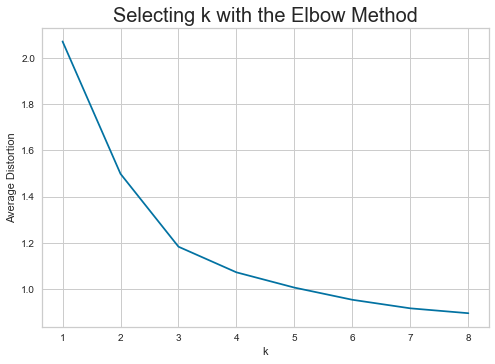

In [23]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

The appropriate value of k from elbow curve seems to be 4 

### Lets check silhoutte score

In [24]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4201583924929177)
For n_clusters = 3, silhouette score is 0.5169867470092899)
For n_clusters = 4, silhouette score is 0.38147048130671246)
For n_clusters = 5, silhouette score is 0.35332888701008774)
For n_clusters = 6, silhouette score is 0.27192376529502327)
For n_clusters = 7, silhouette score is 0.2675477060466648)
For n_clusters = 8, silhouette score is 0.2583872119243142)
For n_clusters = 9, silhouette score is 0.24493582581400006)


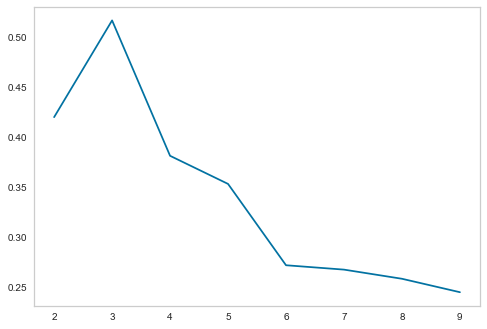

In [25]:
plt.plot(cluster_list,sil_score)
plt.grid()

From the silhouette score, it seems 4 is a good value of k

### Finding Optimal No.of Clusters 

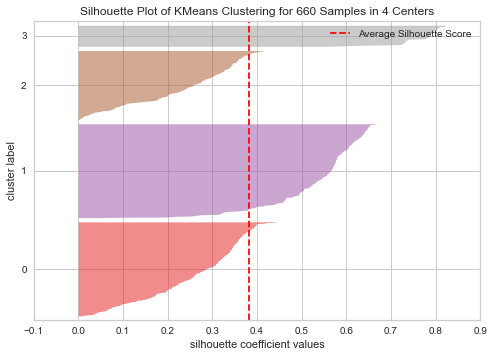

In [26]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

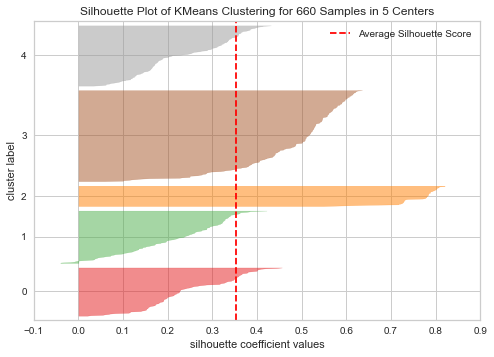

In [27]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

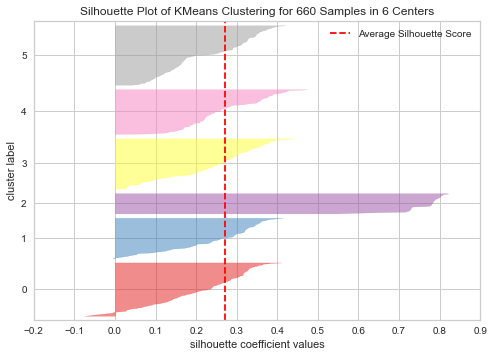

In [28]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

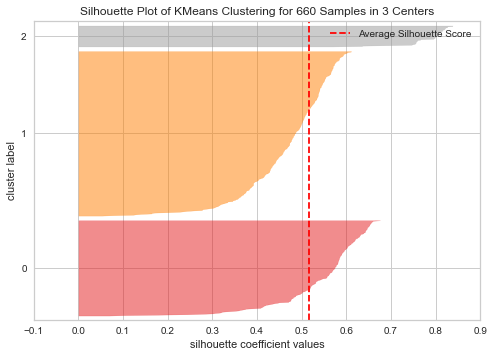

In [29]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

### Let us take 4 as appropriate no. of clusters as silhoutte score is high enough and there is Knick at 4 in elbow curve.

In [30]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)


KMeans(n_clusters=4, random_state=0)

In [31]:
df1=df.copy()#copying preprocessed data from df to df1

In [32]:
df1['K_means_segments'] = kmeans.labels_

### Cluster Profiling K Means

In [33]:
cluster_profile = df1.groupby('K_means_segments').mean()

In [34]:
cluster_profile['count_in_each_segment'] = df1.groupby('K_means_segments')['Avg_Credit_Limit'].count().values

In [35]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,17295.964126,5.497758,3.708520,1.017937,1.941704,223
1,12197.309417,2.403587,0.928251,3.553812,6.883408,223
2,56036.585366,5.530488,3.182927,0.939024,2.091463,164
3,102660.000000,8.740000,0.600000,8.180000,1.080000,50


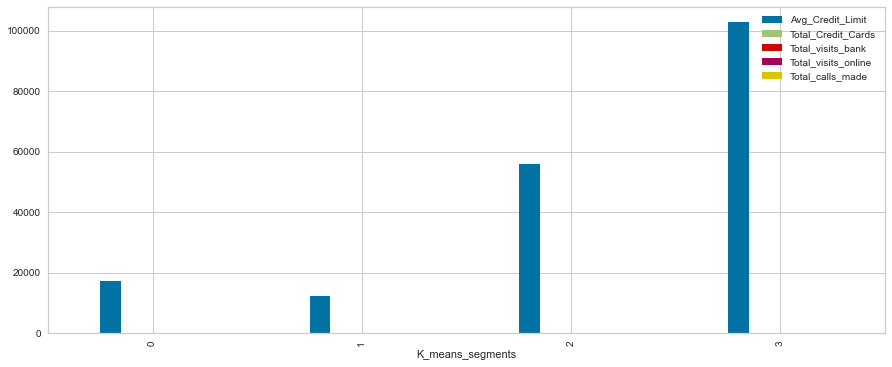

In [48]:
df1.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

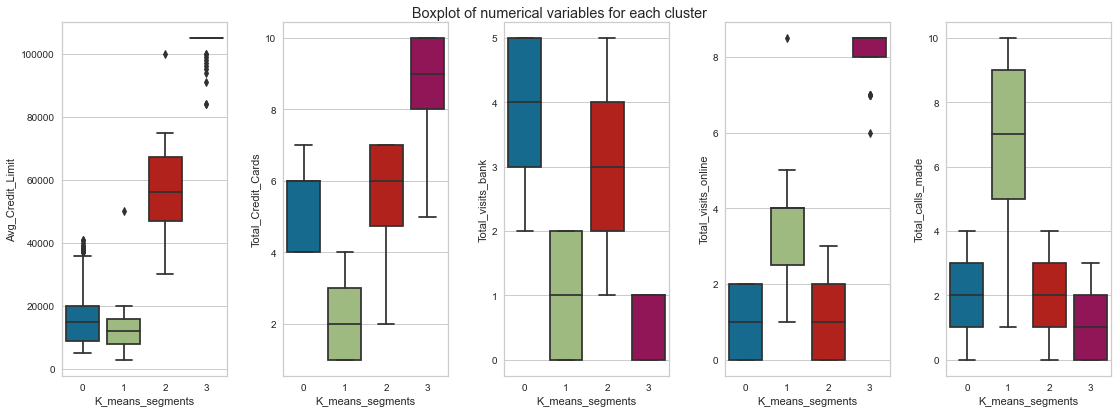

In [37]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df1[all_col[counter]],x=df1['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### Insights-K Means

**Cluster 0**
* Avg_Credit_Limit less than 40,000 for majority of customers
* Total_credit_cards range from 4 to 7
* Total_visits_bank range from 2 to 5
* Total_visits_online range from 0 to 2
* Total_calls_made range from 0 to 4


**Cluster 1**
* Avg_Credit_Limit less than 30,000 to 78000
* Total_credit_cards range from 2 to 7
* Total_visits_bank range from 1 to 5
* Total_visits_online range from 0 to 3
* Total_calls_made range from 0 to 4

**Cluster 2**
* Avg_Credit_Limit less than 1000 to 20000
* Total_credit_cards range from 1 to 4
* Total_visits_bank range from 0 to 2
* Total_visits_online range from 1 to 5
* Total_calls_made range from 1 to 10

**Cluster 3**
* Avg_Credit_Limit less than 81000 to more than 100000
* Total_credit_cards range from 5 to 10
* Total_visits_bank range from 0 to 1
* Total_visits_online range from 6 and above
* Total_calls_made range from 0 to 3

### Hierarchical Clustering

### Standardize the data

In [38]:
subset1=df.copy()
sc = StandardScaler()
subset_scaled_df=pd.DataFrame(sc.fit_transform(subset1),columns=subset1.columns)
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


#### Hierarchical Clustering with different Linkage Methods

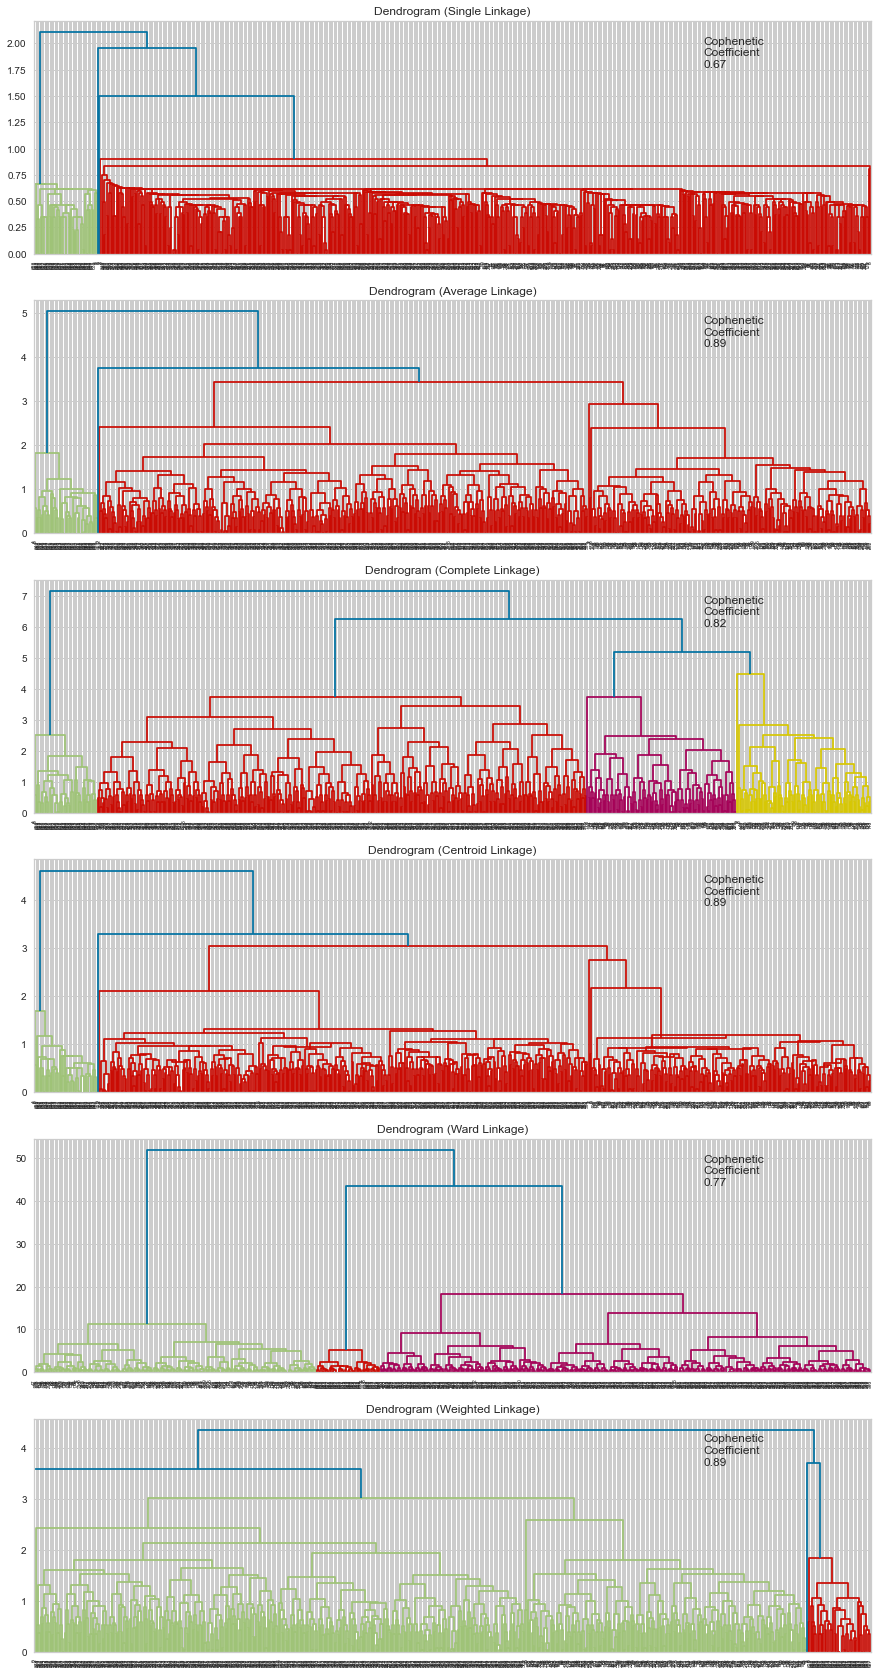

In [39]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
# compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
#     compare.append([method, coph_corr])

**Observation**
* Lets choose Dendrogram with Ward linkage
* 4 clusters would be appropriate number of clusters for us

### Lets us create 4 clusters

In [40]:
#Trying with K value as 4
HCmodel = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [41]:
df2=df.copy()#copying preprocessed data from df to df2

In [42]:
df2['HC_Clusters'] = HCmodel.labels_

### Cluster Profiling Hierarchical Cluster

In [43]:
cluster_profile = df2.groupby('HC_Clusters').mean()

In [44]:
cluster_profile['count_in_each_segments'] = df2.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values

In [45]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,20666.666667,5.474510,3.678431,1.054902,2.054902,255
1,12197.309417,2.403587,0.928251,3.553812,6.883408,223
2,102660.000000,8.740000,0.600000,8.180000,1.080000,50
3,58916.666667,5.583333,3.113636,0.848485,1.909091,132


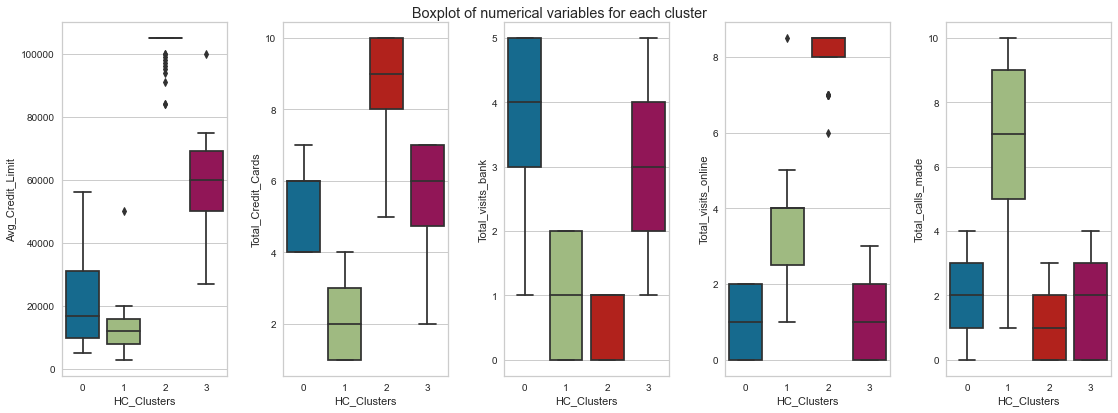

In [46]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df2[all_col[counter]],x=df2['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)


### Insights- Hierarchical Clusters

**Cluster 0**
* Avg_Credit_Limit is up to 5000 to ~58000 for customers in this group
* Total_credit_cards range from 4 to 7
* Total_visits_bank range from 1 to 5
* Total_visits_online range from 0 to 2
* Total_calls_made range from 0 to 4


**Cluster 1**
* Avg_Credit_Limit is up to 20000 for customers in this group
* Total_credit_cards range from 1 to 4
* Total_visits_bank range from 0 to 2
* Total_visits_online range from 1 to 5
* Total_calls_made range from 1 to 10

**Cluster 2**
* Avg_Credit_Limit ranges from above 80000 to ~150000 for customers in this group
* Total_credit_cards range from 5 to 10
* Total_visits_bank range from 0 to 1
* Total_visits_online range from 6 to 9
* Total_calls_made range from 0 to 3

**Cluster 3**
* Avg_Credit_Limit range from about 25000 to 78000
* Total_credit_cards range from 2 to 7
* Total_visits_bank range from 1 to 5
* Total_visits_online range from 0 to 3 visits
* Total_calls_made range from 0 to 4

### Cluster Comparison-K Means & Hierarchical Clusters

We have chosen 4 clusters for both K-Means and Hierarchical clustering .

For Cluster 0, K-Means has 223 customers and HC has 225 customers
The avg_credit_limit for K-Means is less than 40000 and for HC it is less than 58000.Not a huge difference there
Total_credit_cards range from 4 to 7 in both methods
Total_bank_visits range from 2 to 5 for K-means and 1 to 5 for HC.
Total_visits_online range from 0 to 2 for both clustering mechanisms
Total_calls_made also range from 0 to 4 for both.

Like wise we can see similar patterns for the other clusters in both K-Means and Hierarchical Clustering .


### Conclusion & Business Recommendations

**Group 0:**
    **The Average Spending customers**
    * These group of customers have median avg_credit_limit and most of their interactions with the bank are inperson with
      very few online visits and low number of calls made to the bank.The bank can target to make the customers use more of           the online services and reduce inperson visits by providing better customer service
**Group 1:**
    **The Low Spending Customers**
    * These group of customers have low avg_credit_limit and hold the least number of credit cards. Their interactions with 
      the bank are mostly through online and calls made to the bank.The bank can target the customers to increase their 
      average spending by providing more offers and options to chose for better credit cards that suite their needs.
**Group 2:**
    **The High Spending Customers**
    * These group of customers have high avg_credit_limit and hold the highest number of credit cards. Their interactions 
      with the bank are mostly online.The bank should continue to provide good services to these group of customers
**Group 3**
   **The Above Avg Spending Customers**
    * The group of customers have above average credit line .Their interactions with the bank are mostly in person.The Bank
    should provide more options to maintain increase their credit line and better customer service.

    